# Unstructured
- https://unstructured.io/
- https://unstructured-io.github.io/unstructured/index.html
- https://docs.unstructured.io/api-reference/api-services/python-sdk


## Setup

In [1]:
%%capture
%pip install "unstructured[all-docs]" unstructured-client watermark

In [62]:
# Warning control
import warnings
warnings.filterwarnings('ignore')

In [63]:
from IPython.display import JSON

import json

from unstructured_client import UnstructuredClient
from unstructured_client.models import shared
from unstructured_client.models.errors import SDKError

from unstructured.partition.pdf import partition_pdf
from unstructured.staging.base import dict_to_elements, elements_to_json

In [64]:
%load_ext watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


In [65]:
import unstructured

In [66]:
%watermark --iversions

IPython            : 8.27.0
langchain_community: 0.3.1
ipykernel          : 6.29.5
json               : 2.0.9
PIL                : 10.4.0
debugpy            : 1.8.6
unstructured       : 0.15.13
unstructured_client: 0.25.9



## Initial exploration ( extract elements)

In [67]:
import unstructured.partition

help(unstructured.partition)

Help on package unstructured.partition in unstructured:

NAME
    unstructured.partition

PACKAGE CONTENTS
    api
    auto
    common
    csv
    doc
    docx
    email
    epub
    html (package)
    image
    json
    lang
    md
    model_init
    msg
    odt
    org
    pdf
    pdf_image (package)
    ppt
    pptx
    rst
    rtf
    strategies
    text
    text_type
    tsv
    utils (package)
    xlsx
    xml

FILE
    c:\ia\ver2\ia\ia-pdf-youtube-stuffs\.venv\lib\site-packages\unstructured\partition\__init__.py




In [103]:
from unstructured.partition.pdf import partition_pdf

# Specify the path to your PDF file
filename = "data/gpt4all.pdf"
filename = "data/t1.pdf"

# Call the partition_pdf function
# Returns a List[Element] present in the pages of the parsed pdf document
elements = partition_pdf(filename)

# Now, elements is a list of all elements present in the pages of the parsed pdf document

In [104]:
elements

In [105]:
len(elements)

46

In [106]:
element_dict = [el.to_dict() for el in elements]
output = json.dumps(element_dict, indent=2)
print(output)

[
  {
    "type": "Title",
    "element_id": "f07c7c85bcc99c6e8bd516a15ec24b17",
    "text": "Invoice no: 16662010 Date of issue:",
    "metadata": {
      "coordinates": {
        "points": [
          [
            309.0,
            246.0
          ],
          [
            309.0,
            319.0
          ],
          [
            622.0,
            319.0
          ],
          [
            622.0,
            246.0
          ]
        ],
        "system": "PixelSpace",
        "layout_width": 1700,
        "layout_height": 2200
      },
      "filetype": "application/pdf",
      "languages": [
        "eng"
      ],
      "last_modified": "2024-09-26T08:12:34",
      "page_number": 1,
      "file_directory": "data",
      "filename": "t1.pdf"
    }
  },
  {
    "type": "Title",
    "element_id": "0459d106b4333b1216afd05dd69893ae",
    "text": "Seller:",
    "metadata": {
      "coordinates": {
        "points": [
          [
            309.0,
            535.0
          ],
  

In [107]:
unique_types = set()

for item in element_dict:
    unique_types.add(item['type'])

print(unique_types)

{'Title', 'UncategorizedText'}


##### We don't see `Image`, image information is not extracted as we expected, lets use different strategy.

### Image extraction from PDF
- Now let’s say that your PDF has tables and let’s say you want to preserve the image data. 
- You will have to specify the [strategy](https://unstructured-io.github.io/unstructured/best_practices/strategies.html) parameter as `hi_res`. This will use a combination of computer vision and Optical Character Recognition (OCR) to extract the tables and maintain the structure. 

> Note: For even better image extraction Unstructured offers an API that improves upon the existing open source models.

> Depending upon machine, you might face different module / library issues, these links might help
- https://stackoverflow.com/questions/59690698/modulenotfounderror-no-module-named-lzma-when-building-python-using-pyenv-on
- https://unstructured-io.github.io/unstructured/installation/full_installation.html

In [108]:
from unstructured.partition.pdf import partition_pdf

elements = partition_pdf(filename=filename,
                     strategy='hi_res',
           )

In [109]:
element_dict = [el.to_dict() for el in elements]

unique_types = set()

for item in element_dict:
    unique_types.add(item['type'])

print(unique_types)

{'NarrativeText', 'Title', 'UncategorizedText', 'Table'}


In [110]:
print(len(elements))
for el in elements:
    print(el.text)
    print(el.category)
  
print(elements)
#images = [el for el in elements if el.category == "Image"]

#print(images[0].text)
#print(images[0].metadata.text_as_html)

13
Invoice no: 16662010
Title
Date of issue:
NarrativeText
08/28/2016
NarrativeText
Seller:
Title
Client:
Title
Smith-Cook 174 Justin Causeway West Michaelmouth, ME 69894
NarrativeText
Snyder-johnson 05173 Heather Mill Jenniferfort, WV 79662
NarrativeText
Tax Id: 959-84-2124 IBAN: GB20BAKH22085364527355
NarrativeText
Tax Id: 938-85-4960
UncategorizedText
ITEMS
Title
Description Nintendo Gameboy Pocket Console Green with Box MGB-001 Japan Tested Working 59 New Sony Playstation 4 Slim 1TB 3 Game Bundle Console. Sealed!!! Atari Flashback 4 Classic Game Console 75 built in games Space Invaders Asteroid Sony PlayStation 1 PS1 Console model seph-7501 Nintendo Wii Console - 2 Remotes w/ Covers, Nunchucks, Sensor Sega Game Bundie Sony PlayStation 3 PS3 Super Slim Black Console 20 GB “Tested* Console & Cables Nintendo Gameboy Pocket Console Green with Box MGB-001 Japan Tested Working 55 3,00 4,00 4,00 1,00 4,00 3,00 each each each each each each each Net price Networth VAT (%] 65,00 65,00 10% 3

In [88]:
images

In [89]:
len(images)

1

## Another way ( extract / display images + elements )

In [111]:
partition_pdf??

Signature:
partition_pdf(
    filename: 'Optional[str]' = None,
    file: 'Optional[IO[bytes]]' = None,
    include_page_breaks: 'bool' = False,
    strategy: 'str' = 'auto',
    infer_table_structure: 'bool' = False,
    ocr_languages: 'Optional[str]' = None,
    languages: 'Optional[list[str]]' = None,
    include_metadata: 'bool' = True,
    metadata_filename: 'Optional[str]' = None,
    metadata_last_modified: 'Optional[str]' = None,
    chunking_strategy: 'Optional[str]' = None,
    hi_res_model_name: 'Optional[str]' = None,
    extract_images_in_pdf: 'bool' = False,
    extract_image_block_types: 'Optional[list[str]]' = None,
    extract_image_block_output_dir: 'Optional[str]' = None,
    extract_image_block_to_payload: 'bool' = False,
    date_from_file_object: 'bool' = False,
    starting_page_number: 'int' = 1,
    extract_forms: 'bool' = False,
    form_extraction_skip_tables: 'bool' = True,
    **kwargs: 'Any',
) -> 'list[Element]'
Docstring:
Parses a pdf document into a lis

In [112]:
# Get elements
path = "images"
raw_pdf_elements = partition_pdf(filename=filename,
                                 # Unstructured first finds embedded image blocks
                                 # Only applicable if `strategy=hi_res`
                                 extract_images_in_pdf=True,
                                 strategy = "hi_res",
                                 infer_table_structure=True,
                                 # Only applicable if `strategy=hi_res`
                                 extract_image_block_output_dir = path,
                                 )

In [113]:
element_dict = [el.to_dict() for el in raw_pdf_elements]

unique_types = set()

for item in element_dict:
    unique_types.add(item['type'])

print(unique_types)

{'NarrativeText', 'Title', 'UncategorizedText', 'Table'}


In [93]:
images = [el for el in raw_pdf_elements if el.category == "Image"]

print(images[0].text)
print(images[0].metadata.text_as_html)


None


### Let's display the images extracted

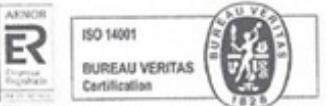

In [114]:
from IPython.display import Image, display
import glob

# Define the path to the folder containing the images
folder_path = "images/*.jpg"  # Update the file type as needed

# Use glob to search for JPG files in the specified folder
image_files = glob.glob(folder_path)

# Iterate through the list of image files and display each image inline
for image_file in image_files:
    display(Image(filename=image_file))

## Multi-modal (explain image using Llava)
#### Now, lets plugin in LangChain to explaiin the image using `Llava` via `Ollama`. More info in this [link](https://python.langchain.com/v0.1/docs/integrations/llms/ollama/)
#### [Ollama Playlist](https://www.youtube.com/playlist?list=PLz-qytj7eIWX-bpcRtvkixvo9fuejVr8y)

In [95]:
%%capture
%pip install langchain langchain_core langchain_community

In [116]:
from langchain_community.llms import Ollama

In [97]:
Ollama??

Init signature:
Ollama(
    *args: Any,
    name: Optional[str] = None,
    cache: Union[langchain_core.caches.BaseCache, bool, NoneType] = None,
    verbose: bool = None,
    callbacks: Union[list[langchain_core.callbacks.base.BaseCallbackHandler], langchain_core.callbacks.base.BaseCallbackManager, NoneType] = None,
    tags: Optional[list[str]] = None,
    metadata: Optional[dict[str, Any]] = None,
    custom_get_token_ids: Optional[Callable[[str], list[int]]] = None,
    base_url: str = 'http://localhost:11434',
    model: str = 'llama2',
    mirostat: Optional[int] = None,
    mirostat_eta: Optional[float] = None,
    mirostat_tau: Optional[float] = None,
    num_ctx: Optional[int] = None,
    num_gpu: Optional[int] = None,
    num_thread: Optional[int] = None,
    num_predict: Optional[int] = None,
    repeat_last_n: Optional[int] = None,
    repeat_penalty: Optional[float] = None,
    temperature: Optional[float] = None,
    stop: Optional[List[str]] = None,
    tfs_z: Optional[f

In [117]:
llm = Ollama(model="llama3.2:3b")#llava:7b")

In [118]:
import PIL
print(PIL.__version__)

10.4.0



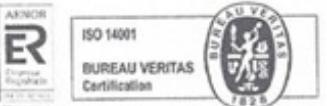

In [119]:
import base64
from io import BytesIO

from IPython.display import HTML, display
from PIL import Image


def convert_to_base64(pil_image):
    """
    Convert PIL images to Base64 encoded strings

    :param pil_image: PIL image
    :return: Re-sized Base64 string
    """

    buffered = BytesIO()
    pil_image.save(buffered, format="JPEG")  # You can change the format if needed
    img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")
    return img_str


def plt_img_base64(img_base64):
    """
    Display base64 encoded string as image

    :param img_base64:  Base64 string
    """
    # Create an HTML img tag with the base64 string as the source
    image_html = f'<img src="data:image/jpeg;base64,{img_base64}" />'
    # Display the image by rendering the HTML
    display(HTML(image_html))


file_path = "./images/figure-1-1.jpg"
pil_image = Image.open(file_path)
image_b64 = convert_to_base64(pil_image)
plt_img_base64(image_b64)

In [120]:
llm_with_image_context = llm.bind(images=[image_b64])
llm_with_image_context.invoke("Explain the image")

"I'm happy to help, but I don't see an image attached. Can you please provide a description of the image or paste the URL of the image you'd like me to describe?"